<a href="https://colab.research.google.com/github/mebirtukan/Event_detection/blob/main/IDT_sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import  TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score



In [ ]:
!wget www.kasprowski.pl/datasets/events.zip
!unzip events.zip > xxxy

--2022-08-31 22:24:05--  http://www.kasprowski.pl/datasets/events.zip
Resolving www.kasprowski.pl (www.kasprowski.pl)... 94.152.164.213
Connecting to www.kasprowski.pl (www.kasprowski.pl)|94.152.164.213|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2909538 (2.8M) [application/zip]
Saving to: ‘events.zip’

events.zip          100%[===================>]   2.77M  1.94MB/s    in 1.4s    

2022-08-31 22:24:07 (1.94 MB/s) - ‘events.zip’ saved [2909538/2909538]



In [ ]:

def openfile(filename):
  mat = loadmat(filename)
  mdata = mat['ETdata']
  mtype = mdata.dtype
  ndata = {n: mdata[n][0,0] for n in mtype.names}
  ndata

  data_headline = ndata['pos']
  print(data_headline)
  data_headline = data_headline[0]
  data_raw = ndata['pos']
  len(data_raw)
  pdata = pd.DataFrame(data_raw,columns=data_headline)
  df=pd.DataFrame(pdata)
  df=pd.DataFrame(pdata)
  df.dtypes
  df[1.0]=df[1.0].astype(int)
  df[1.0].dtypes
  x=pdata.iloc[:, 3:5].values
  y=pdata.iloc[:, 5].values
  x[0]
  x.shape[0]
  return x ,y

In [ ]:
## we don't use it here for now
def open_list_of_files(files_to_load):
  samples = []
  labels =[]
  for my_file in files_to_load:
    sam,lab = openfile(my_file)
    #ssam,slab = make_sequences(sam,lab,50)
    print('Number of samples so far:',len(samples))
    samples.extend(sam)
    labels.extend(lab)
  samples = np.array(samples)
  labels = np.array(labels)
  print('Number of samples at the end:',len(samples))
  return samples,labels
files_to_load = ['data/UH33_img_vy_labelled_MN.mat','data/UH47_img_Europe_labelled_RA.mat','data/UH21_img_Rome_labelled_MN.mat']
#files_to_load = ['data/TH34_img_Europe_labelled_MN.mat', 'data/UH21_img_Rome_labelled_RA.mat', 'data/UH47_img_Europe_labelled_MN.mat', 'data/UH27_img_vy_labelled_MN.mat']

#s,l = open_list_of_files(files_to_load)
x,y=open_list_of_files(files_to_load)
#print(x.shape)
#print(y.shape)
#print(s1.shape)
#print(l1.shape)

[[3.92137817e+09 2.30000000e+01 2.20000000e+01 5.13900500e+02
  4.03585700e+02 1.00000000e+00]
 [3.92138017e+09 2.30000000e+01 2.20000000e+01 5.14502200e+02
  4.03069100e+02 1.00000000e+00]
 [3.92138217e+09 2.30000000e+01 2.20000000e+01 5.14937900e+02
  4.03189600e+02 1.00000000e+00]
 ...
 [3.93135019e+09 2.50000000e+01 2.40000000e+01 5.53063700e+02
  5.37588400e+02 1.00000000e+00]
 [3.93135219e+09 2.50000000e+01 2.40000000e+01 5.53479800e+02
  5.37836700e+02 1.00000000e+00]
 [3.93135419e+09 2.50000000e+01 2.40000000e+01 5.52668200e+02
  5.37910200e+02 1.00000000e+00]]
Number of samples so far: 0
[[2.59371216e+09 2.10000000e+01 2.10000000e+01 5.04312800e+02
  3.94728500e+02 1.00000000e+00]
 [2.59371716e+09 2.10000000e+01 2.10000000e+01 5.04939200e+02
  3.94330800e+02 1.00000000e+00]
 [2.59372216e+09 2.10000000e+01 2.10000000e+01 5.05242100e+02
  3.93573200e+02 1.00000000e+00]
 ...
 [2.60368213e+09 2.40000000e+01 2.40000000e+01 7.46249600e+02
  3.18997200e+02 1.00000000e+00]
 [2.6036871

In [ ]:
#x,y=openfile('data/UH33_img_vy_labelled_MN.mat')

In [ ]:
# sequence 
def make_sequences(samples, labels, sequence_dim = 100, sequence_lag = 1, sequence_attributes = 2):
    nsamples = []
    nlabels = [] 
    for i in range(0,samples.shape[0]-sequence_dim,sequence_lag):
            nsample = np.zeros((sequence_dim,sequence_attributes))
            for j in range(i,i+sequence_dim):
                nsample[j-i,0] = samples[j,0]
                nsample[j-i,1] = samples[j,1]
            nlabel = labels[i+sequence_dim//2]
            nsamples.append(nsample)
            nlabels.append(nlabel)
        
    samples = np.array(nsamples)
    labels = np.array(nlabels)
    return samples,labels 

In [ ]:
sequence_dim = 2
print("Converting to sequences of length {}".format(sequence_dim))
X,Y = make_sequences(x, y, sequence_dim)
#x1,y1 = make_sequences(s1, l1, sequence_dim)
print("done:",X.shape )

Converting to sequences of length 2
done: (11971, 2, 2)


In [ ]:
#X = X.reshape(-1, sequence_dim*2)
x.shape

(11973, 2)

In [ ]:
type(X)


numpy.ndarray

In [ ]:
X[0][1]

array([514.5022, 403.0691])

In [ ]:
#calculate dsipersion for sequence of previous to next samples

In [ ]:
from scipy.spatial import distance
import csv
import numpy as np

def calcu_disp(data, disp_thres):
  Xs = data[:,[0]]
  Ys = data[:,[1]]

  
  disper = [] #x values difference
  #Y = [] #y values difference 
  #Dispersion=[]
  mvmts=[]

  for i in range(len(data) - 1):
    if i>=sequence_dim:
      disper.append(max((Xs[i-sequence_dim:i+sequence_dim])) - min((Xs[i-sequence_dim:i+sequence_dim]) )+(max(Ys[i-sequence_dim:i+sequence_dim]) - min(Ys[i-sequence_dim:i:i+sequence_dim]) ))
    else:
      disper.append(0)
    #Y.append(max(Ys[i:i+sequence_dim]) - min(Ys[i:i+sequence_dim]) )
  #Dispersion=(X+Y)
  #Dispersion=np.absolute(Dispersion)
  Dispersion=np.absolute(disper)
  print(Dispersion)
  print('Max Dipersion=', max(Dispersion))
  print('min disp=', min(Dispersion))

  for D in Dispersion:
    if(D<disp_thres):
      mvmts.append(1)
    else:
        mvmts.append(2)
  return mvmts
  #store 1 in mvmts[] if dispersion is less than threshold else store 2
  
y1=calcu_disp(x, disp_thres=0.1)
  

  




[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
#calculate dsipersion for sequence of current to next samples

In [ ]:
y_pred=np.array(y1)

In [ ]:
y_pred.shape, len(y)

((11972,), 11973)

In [ ]:
thresholds=[0, 1.0, 1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.75, 5.0, 5.5, 6.0, 6.5, 7, 7.5, 8, 9, 10, 12,13, 14, 15, 16, 20, 22, 25, 30, 35, 50]


In [ ]:
y=y[:-1]

In [ ]:
#thresholds=[x/10 for x in range(0,50)]

from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, precision_score, cohen_kappa_score, recall_score
fixation_recall=[]
fixation_precision=[]
fixation_f1_score=[]
saccade_recall=[]
saccade_precision=[]
saccade_f1_score=[]


for t in thresholds:
  y1=calcu_disp(x, disp_thres=t)
  y_pred=np.array(y1)
    #y_pred=np.array(y1)
  #y=(y[:-1])
  #print(len(y_real))
 # print(len(y_pred))
  cm=confusion_matrix(y, y_pred)
  #print(cm)
  print(classification_report(y,y_pred))
  print('Kochen kappa for threshold', t, cohen_kappa_score(y, y_pred))
  #print(classification_report(y,y_pred['f1-score']))
  #Fixation accuracy calculation
  sumf=cm[0][0]+cm[0][1]
  Tc=cm[0][0]
  fixation_recall.append(Tc*100/sumf)
  print('Fixation recall at threshol',t, 'is', fixation_recall[-1])
  #fixation precision 
  sumfp=cm[0][0]+cm[1][0]
  Tcfp=cm[0][0]
  fixation_precision.append(Tcfp*100/sumfp)
  print('Fixation precission at threshold', t, 'is', fixation_precision[-1])
  #fixation f1_score
  multiple_recal_prec=2*((Tcfp*100/sumfp)*(Tc*100/sumf))
  add_recall_prec=((Tc*100/sumf)+Tcfp*100/sumfp)
  result_f1_score=multiple_recal_prec/add_recall_prec
  fixation_f1_score.append(result_f1_score)
  print('fixation_f1_score for threshold', t, 'is', fixation_f1_score[-1])
  #Saccade accuracy calculation
  sums=cm[1][0]+cm[1][1]
  Tcs=cm[1][1]
  saccade_recall.append(Tcs*100/sums)
  print('Saccade recall at threshol',t, 'is', saccade_recall[-1])
  #Saccade precison
  sum_saccP=cm[0][1]+cm[1][1]
  Tc_saccP=cm[1][1]
  saccade_precision.append(Tc_saccP*100/sum_saccP)
  print('saccade_precision for threshold', t, 'is', saccade_precision[-1])
  #saccade f1_score
  multiply=2*((Tc_saccP*100/sum_saccP)*(Tcs*100/sums))
  addition=(Tcs*100/sums)+(Tc_saccP*100/sum_saccP)
  saccade_f1_score.append(multiply/addition)
  print('saccade_f1_score for threshold', t, 'is', saccade_f1_score[-1])
  
  
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     10092
           2       0.10      1.00      0.18      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.10     11972
   macro avg       0.03      0.33      0.06     11972
weighted avg       0.01      0.10      0.02     11972

Kochen kappa for threshold 0 0.0
Fixation recall at threshol 0 is 0.0
Fixation precission at threshold 0 is nan
fixation_f1_score for threshold 0 is nan
Saccade recall at threshol 0 is 100.0
saccade_precision for threshold 0 is 10.595322466335931
saccade_f1_score for threshold 0 is 19.160525472604935


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.99      0.39      0.56     10092
           2       0.15      0.99      0.26      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.43     11972
   macro avg       0.38      0.46      0.27     11972
weighted avg       0.85      0.43      0.50     11972

Kochen kappa for threshold 1.0 0.12571777425229813
Fixation recall at threshol 1.0 is 38.991280221957986
Fixation precission at threshold 1.0 is 99.82242516489092
fixation_f1_score for threshold 1.0 is 56.07809605244406
Saccade recall at threshol 1.0 is 99.41471571906355
saccade_precision for threshold 1.0 is 16.18567928124149
saccade_f1_score for threshold 1.0 is 27.838913603371576


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.99      0.39      0.56     10092
           2       0.15      0.99      0.26      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.43     11972
   macro avg       0.38      0.46      0.27     11972
weighted avg       0.85      0.43      0.50     11972

Kochen kappa for threshold 1 0.12571777425229813
Fixation recall at threshol 1 is 38.991280221957986
Fixation precission at threshold 1 is 99.82242516489092
fixation_f1_score for threshold 1 is 56.07809605244406
Saccade recall at threshol 1 is 99.41471571906355
saccade_precision for threshold 1 is 16.18567928124149
saccade_f1_score for threshold 1 is 27.838913603371576


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.99      0.62      0.77     10092
           2       0.21      0.98      0.35      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.62     11972
   macro avg       0.40      0.54      0.37     11972
weighted avg       0.86      0.62      0.68     11972

Kochen kappa for threshold 1.5 0.25662691046216446
Fixation recall at threshol 1.5 is 62.33650416171225
Fixation precission at threshold 1.5 is 99.71469329529243
fixation_f1_score for threshold 1.5 is 76.71483446131333
Saccade recall at threshol 1.5 is 98.49498327759197
saccade_precision for threshold 1.5 is 23.659369351275355
saccade_f1_score for threshold 1.5 is 38.153846153846146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.99      0.78      0.87     10092
           2       0.29      0.98      0.45      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.75     11972
   macro avg       0.43      0.59      0.44     11972
weighted avg       0.86      0.75      0.78     11972

Kochen kappa for threshold 2.0 0.3956206689316657
Fixation recall at threshol 2.0 is 77.95283392786365
Fixation precission at threshold 2.0 is 99.63272543059777
fixation_f1_score for threshold 2.0 is 87.46942406048477
Saccade recall at threshol 2.0 is 97.5752508361204
saccade_precision for threshold 2.0 is 34.404481132075475
saccade_f1_score for threshold 2.0 is 50.871839581516994


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.99      0.87      0.92     10092
           2       0.37      0.96      0.54      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.83     11972
   macro avg       0.45      0.61      0.49     11972
weighted avg       0.87      0.83      0.83     11972

Kochen kappa for threshold 2.5 0.5057467468128674
Fixation recall at threshol 2.5 is 86.8014268727705
Fixation precission at threshold 2.5 is 99.50022716946842
fixation_f1_score for threshold 2.5 is 92.71803556308213
Saccade recall at threshol 2.5 is 96.32107023411372
saccade_precision for threshold 2.5 is 46.3768115942029
saccade_f1_score for threshold 2.5 is 62.60869565217392


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.98      0.92      0.95     10092
           2       0.45      0.95      0.61      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.87     11972
   macro avg       0.48      0.62      0.52     11972
weighted avg       0.87      0.87      0.86     11972

Kochen kappa for threshold 3.0 0.5839651769400473
Fixation recall at threshol 3.0 is 92.01347602061038
Fixation precission at threshold 3.0 is 99.30488717784195
fixation_f1_score for threshold 3.0 is 95.52023864629943
Saccade recall at threshol 3.0 is 94.56521739130434
saccade_precision for threshold 3.0 is 58.38926174496644
saccade_f1_score for threshold 3.0 is 72.19917012448133


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.98      0.95      0.96     10092
           2       0.51      0.93      0.66      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.89     11972
   macro avg       0.49      0.63      0.54     11972
weighted avg       0.87      0.89      0.88     11972

Kochen kappa for threshold 3.5 0.6262891890223878
Fixation recall at threshol 3.5 is 94.62940943321443
Fixation precission at threshold 3.5 is 99.11779968863519
fixation_f1_score for threshold 3.5 is 96.8216150453693
Saccade recall at threshol 3.5 is 92.89297658862876
saccade_precision for threshold 3.5 is 67.21113127646703
saccade_f1_score for threshold 3.5 is 77.99227799227799


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.97      0.96      0.97     10092
           2       0.55      0.91      0.69      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.90     11972
   macro avg       0.51      0.63      0.55     11972
weighted avg       0.87      0.90      0.88     11972

Kochen kappa for threshold 4.0 0.6532477981672633
Fixation recall at threshol 4.0 is 96.31391200951248
Fixation precission at threshold 4.0 is 98.9413680781759
fixation_f1_score for threshold 4.0 is 97.60996183972685
Saccade recall at threshol 4.0 is 91.30434782608695
saccade_precision for threshold 4.0 is 74.59016393442623
saccade_f1_score for threshold 4.0 is 82.10526315789474


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.96      0.98      0.97     10092
           2       0.61      0.89      0.72      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.52      0.62      0.56     11972
weighted avg       0.87      0.91      0.89     11972

Kochen kappa for threshold 4.75 0.6703949352013834
Fixation recall at threshol 4.75 is 97.66151407055094
Fixation precission at threshold 4.75 is 98.70806209313972
fixation_f1_score for threshold 4.75 is 98.18199930268467
Saccade recall at threshol 4.75 is 89.21404682274247
saccade_precision for threshold 4.75 is 81.88795088257866
saccade_f1_score for threshold 4.75 is 85.39415766306523


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.96      0.98      0.97     10092
           2       0.62      0.89      0.73      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.53      0.62      0.57     11972
weighted avg       0.87      0.91      0.89     11972

Kochen kappa for threshold 5.0 0.6746138945259996
Fixation recall at threshol 5.0 is 97.98850574712644
Fixation precission at threshold 5.0 is 98.643391521197
fixation_f1_score for threshold 5.0 is 98.31485808023065
Saccade recall at threshol 5.0 is 88.62876254180603
saccade_precision for threshold 5.0 is 83.92715756136184
saccade_f1_score for threshold 5.0 is 86.21390809272062


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.96      0.98      0.97     10092
           2       0.65      0.87      0.74      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.92     11972
   macro avg       0.54      0.62      0.57     11972
weighted avg       0.87      0.92      0.89     11972

Kochen kappa for threshold 5.5 0.6764853687936545
Fixation recall at threshol 5.5 is 98.42449464922711
Fixation precission at threshold 5.5 is 98.49281110560239
fixation_f1_score for threshold 5.5 is 98.45864102691183
Saccade recall at threshol 5.5 is 87.29096989966555
saccade_precision for threshold 5.5 is 86.78304239401496
saccade_f1_score for threshold 5.5 is 87.0362651104627


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.95      0.99      0.97     10092
           2       0.67      0.86      0.75      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.92     11972
   macro avg       0.54      0.62      0.57     11972
weighted avg       0.87      0.92      0.89     11972

Kochen kappa for threshold 6.0 0.6766476186427994
Fixation recall at threshol 6.0 is 98.79112168053904
Fixation precission at threshold 6.0 is 98.32347140039448
fixation_f1_score for threshold 6.0 is 98.55674179517597
Saccade recall at threshol 6.0 is 85.78595317725753
saccade_precision for threshold 6.0 is 89.37282229965157
saccade_f1_score for threshold 6.0 is 87.54266211604096


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.95      0.99      0.97     10092
           2       0.70      0.85      0.77      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.92     11972
   macro avg       0.55      0.61      0.58     11972
weighted avg       0.87      0.92      0.90     11972

Kochen kappa for threshold 6.5 0.678600415894693
Fixation recall at threshol 6.5 is 99.16765755053508
Fixation precission at threshold 6.5 is 98.20429790992051
fixation_f1_score for threshold 6.5 is 98.68362668244345
Saccade recall at threshol 6.5 is 84.6989966555184
saccade_precision for threshold 6.5 is 92.34275296262534
saccade_f1_score for threshold 6.5 is 88.35586567815089


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.95      0.99      0.97     10092
           2       0.72      0.84      0.77      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.92     11972
   macro avg       0.55      0.61      0.58     11972
weighted avg       0.87      0.92      0.89     11972

Kochen kappa for threshold 7 0.6757299739885638
Fixation recall at threshol 7 is 99.35592548553309
Fixation precission at threshold 7 is 98.07316118935837
fixation_f1_score for threshold 7 is 98.7103760582792
Saccade recall at threshol 7 is 83.52842809364549
saccade_precision for threshold 7 is 93.89097744360902
saccade_f1_score for threshold 7 is 88.40707964601769


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.94      0.99      0.97     10092
           2       0.73      0.82      0.77      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.92     11972
   macro avg       0.56      0.61      0.58     11972
weighted avg       0.87      0.92      0.89     11972

Kochen kappa for threshold 7.5 0.6708525785049877
Fixation recall at threshol 7.5 is 99.48474038842647
Fixation precission at threshold 7.5 is 97.93211080764729
fixation_f1_score for threshold 7.5 is 98.70232009437673
Saccade recall at threshol 7.5 is 82.27424749163879
saccade_precision for threshold 7.5 is 94.98069498069498
saccade_f1_score for threshold 7.5 is 88.17204301075269


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.94      1.00      0.97     10092
           2       0.74      0.81      0.78      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.92     11972
   macro avg       0.56      0.60      0.58     11972
weighted avg       0.87      0.92      0.89     11972

Kochen kappa for threshold 8 0.6654899018631107
Fixation recall at threshol 8 is 99.55410225921521
Fixation precission at threshold 8 is 97.80957943925233
fixation_f1_score for threshold 8 is 98.67413081909251
Saccade recall at threshol 8 is 81.18729096989966
saccade_precision for threshold 8 is 95.57086614173228
saccade_f1_score for threshold 8 is 87.79385171790236


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.94      1.00      0.97     10092
           2       0.77      0.79      0.78      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.92     11972
   macro avg       0.57      0.60      0.58     11972
weighted avg       0.87      0.92      0.89     11972

Kochen kappa for threshold 9 0.6533446576219282
Fixation recall at threshol 9 is 99.70273483947682
Fixation precission at threshold 9 is 97.54726126999515
fixation_f1_score for threshold 9 is 98.61322095359435
Saccade recall at threshol 9 is 78.84615384615384
saccade_precision for threshold 9 is 96.91675231243576
saccade_f1_score for threshold 9 is 86.95251267865375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.93      1.00      0.96     10092
           2       0.80      0.77      0.78      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.92     11972
   macro avg       0.58      0.59      0.58     11972
weighted avg       0.86      0.92      0.89     11972

Kochen kappa for threshold 10 0.6406205262607577
Fixation recall at threshol 10 is 99.78200554894967
Fixation precission at threshold 10 is 97.32289552527303
fixation_f1_score for threshold 10 is 98.53711042614609
Saccade recall at threshol 10 is 76.83946488294315
saccade_precision for threshold 10 is 97.66206163655686
saccade_f1_score for threshold 10 is 86.00842302292935


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.92      1.00      0.96     10092
           2       0.84      0.74      0.79      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.92     11972
   macro avg       0.59      0.58      0.58     11972
weighted avg       0.86      0.92      0.89     11972

Kochen kappa for threshold 12 0.620283877671522
Fixation recall at threshol 12 is 99.91082045184304
Fixation precission at threshold 12 is 96.96124627368016
fixation_f1_score for threshold 12 is 98.41393782636278
Saccade recall at threshol 12 is 73.57859531772576
saccade_precision for threshold 12 is 98.98762654668167
saccade_f1_score for threshold 12 is 84.41247002398082


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.92      1.00      0.96     10092
           2       0.85      0.71      0.78      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.59      0.57      0.58     11972
weighted avg       0.86      0.91      0.88     11972

Kochen kappa for threshold 13 0.6048851423397843
Fixation recall at threshol 13 is 99.91082045184304
Fixation precission at threshold 13 is 96.70087273424762
fixation_f1_score for threshold 13 is 98.27964325746869
Saccade recall at threshol 13 is 71.23745819397993
saccade_precision for threshold 13 is 98.95470383275261
saccade_f1_score for threshold 13 is 82.8390860476422


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.92      1.00      0.96     10092
           2       0.86      0.70      0.77      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.59      0.57      0.58     11972
weighted avg       0.86      0.91      0.88     11972

Kochen kappa for threshold 14 0.5942357749319703
Fixation recall at threshol 14 is 99.91082045184304
Fixation precission at threshold 14 is 96.53422690282432
fixation_f1_score for threshold 14 is 98.19350440668063
Saccade recall at threshol 14 is 69.7324414715719
saccade_precision for threshold 14 is 98.932384341637
saccade_f1_score for threshold 14 is 81.80480627758706


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.91      1.00      0.95     10092
           2       0.87      0.68      0.76      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.60      0.56      0.57     11972
weighted avg       0.86      0.91      0.88     11972

Kochen kappa for threshold 15 0.5827545905689159
Fixation recall at threshol 15 is 99.92072929052715
Fixation precission at threshold 15 is 96.35008599273839
fixation_f1_score for threshold 15 is 98.10292830041831
Saccade recall at threshol 15 is 68.06020066889631
saccade_precision for threshold 15 is 99.02676399026764
saccade_f1_score for threshold 15 is 80.67393458870167


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.91      1.00      0.95     10092
           2       0.88      0.66      0.76      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11972
   macro avg       0.60      0.55      0.57     11972
weighted avg       0.86      0.91      0.88     11972

Kochen kappa for threshold 16 0.5692335329718758
Fixation recall at threshol 16 is 99.93063812921126
Fixation precission at threshold 16 is 96.13918017159199
fixation_f1_score for threshold 16 is 97.99825089884365
Saccade recall at threshol 16 is 66.1371237458194
saccade_precision for threshold 16 is 99.12280701754386
saccade_f1_score for threshold 16 is 79.33801404212637


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.90      1.00      0.95     10092
           2       0.91      0.60      0.72      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.90     11972
   macro avg       0.60      0.53      0.56     11972
weighted avg       0.85      0.90      0.87     11972

Kochen kappa for threshold 20 0.5236673280459174
Fixation recall at threshol 20 is 99.94054696789536
Fixation precission at threshold 20 is 95.43003122338915
fixation_f1_score for threshold 20 is 97.63322201248731
Saccade recall at threshol 20 is 59.61538461538461
saccade_precision for threshold 20 is 99.16550764951322
saccade_f1_score for threshold 20 is 74.46475195822454


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.90      1.00      0.95     10092
           2       0.92      0.57      0.70      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.90     11972
   macro avg       0.61      0.52      0.55     11972
weighted avg       0.85      0.90      0.87     11972

Kochen kappa for threshold 22 0.5030692329973798
Fixation recall at threshol 22 is 99.94054696789536
Fixation precission at threshold 22 is 95.13299377475948
fixation_f1_score for threshold 22 is 97.47752971875906
Saccade recall at threshol 22 is 56.8561872909699
saccade_precision for threshold 22 is 99.12536443148689
saccade_f1_score for threshold 22 is 72.2635494155154


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.89      1.00      0.94     10092
           2       0.93      0.52      0.67      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.89     11972
   macro avg       0.61      0.51      0.54     11972
weighted avg       0.85      0.89      0.86     11972

Kochen kappa for threshold 25 0.46809604311974795
Fixation recall at threshol 25 is 99.94054696789536
Fixation precission at threshold 25 is 94.61538461538461
fixation_f1_score for threshold 25 is 97.20508866615266
Saccade recall at threshol 25 is 52.0066889632107
saccade_precision for threshold 25 is 99.04458598726114
saccade_f1_score for threshold 25 is 68.2017543859649


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.89      1.00      0.94     10092
           2       0.94      0.46      0.62      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.89     11972
   macro avg       0.61      0.49      0.52     11972
weighted avg       0.84      0.89      0.85     11972

Kochen kappa for threshold 30 0.4210245837646528
Fixation recall at threshol 30 is 99.94054696789536
Fixation precission at threshold 30 is 93.96310788149805
fixation_f1_score for threshold 30 is 96.8596946125036
Saccade recall at threshol 30 is 45.819397993311036
saccade_precision for threshold 30 is 98.91696750902527
saccade_f1_score for threshold 30 is 62.62857142857143


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.88      1.00      0.94     10092
           2       0.96      0.40      0.56      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.88     11972
   macro avg       0.61      0.47      0.50     11972
weighted avg       0.84      0.88      0.84     11972

Kochen kappa for threshold 35 0.371835332029276
Fixation recall at threshol 35 is 99.94054696789536
Fixation precission at threshold 35 is 93.319763138416
fixation_f1_score for threshold 35 is 96.51674641148327
Saccade recall at threshol 35 is 39.63210702341137
saccade_precision for threshold 35 is 98.75
saccade_f1_score for threshold 35 is 56.56324582338902
[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

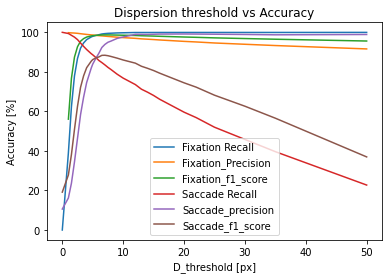

In [ ]:
plt.plot(thresholds, fixation_recall, label="Fixation Recall")
plt.plot(thresholds, fixation_precision, label="Fixation_Precision")
plt.plot(thresholds, fixation_f1_score, label="Fixation_f1_score")
plt.plot(thresholds, saccade_recall, label="Saccade Recall")
plt.plot(thresholds, saccade_precision, label="Saccade_precision")
plt.plot(thresholds, saccade_f1_score, label="Saccade_f1_score")



#plt.plot(thresholds, accuracy, label="Acuracy")
plt.xlabel("D_threshold [px]")
plt.ylabel("Accuracy [%]")
plt.title("Dispersion threshold vs Accuracy")
plt.legend()
plt.show()